# Radial Teukolsky tutorial

## Load `pybhpt.radial`

In [1]:
from pybhpt.radial import RadialTeukolsky
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

## Solving the homogeneous radial Teukolsky equation in Kerr spacetime

The `RadialTeukolsky` class solves the homogeneous radial Teukolsky equation
$$\left[\Delta^{-s} \frac{d}{dr} \left(\Delta^{s+1} \frac{d }{dr}  \right) + \left(\frac{K^2-2is(r-M)K}{\Delta}+4is\omega r - \lambda_{sjm\omega} \right)\right]R_{sjm\omega} =0$$
given the parameters:
- $s$ : spin-weight of the perturbation
- $j$ : the spheroidal polar mode number
- $m$ : the azimuthal mode number
- $a$ : the dimensionless Kerr spin parameter
- $\omega$ : the frequency

where $\Delta=r^2-2Mr+a^2$, $K=(r^2+a^2)\omega-ma$, and $\lambda_{sjm\omega}$ is the spheroidal 
eigenvalue (separation constant).

In particular we construct the homogeneous solutions $R^\mathrm{In}_{sjm\omega}$ and $R^\mathrm{Up}_{sjm\omega}$, which correspond to the asymptotic boundary conditions
$$\begin{align}
    R^\mathrm{In}_{sjm\omega} (r \rightarrow r_+) &\sim A^\mathrm{trans}_s \Delta^{-s} e^{-i k r_*},
    \\
    R^\mathrm{In}_{sjm\omega} (r \rightarrow \infty) &\sim A^\mathrm{ref}_s r^{-(2s+1)} e^{i\omega r_*}
    + A^\mathrm{inc}_s r^{-1} e^{-i\omega r_*},
    \\
    R^\mathrm{Up}_{sjm\omega} (r \rightarrow r_+) &\sim B^\mathrm{ref}_s \Delta^{-s} e^{-i k r_*}
    + B^\mathrm{inc}_s e^{i k r_*},
    \\
    R^\mathrm{Up}_{sjm\omega} (r \rightarrow \infty) &\sim 
    B^\mathrm{trans}_s r^{-(2s+1)} e^{i\omega r_*},
\end{align}$$
where $k = \omega - m \omega_+$, $\omega_+ = a/(2Mr_+)$, and the tortoise coordinate is given by the differential relation $dr_{*}/dr = (r^2+a^2)/\Delta$, which can be immediately integrated, leading to
$$r_* = r + \frac{r_+}{\kappa} \ln \frac{r-r_+}{2M} 
    - \frac{r_-}{\kappa} \ln \frac{r-r_-}{2M},$$
where $\kappa = \sqrt{1 - q^2}$ and $q = a/M$.

To construct the solutions for some set of radial points $r$, we first instantiate the class with the Teukolsky parameters $(s, j, m, a, \omega)$ and the points $r$,

In [62]:
s, j, m, a, omega = -2, 12, 3, 0.99, 2.2
r_hor = 1 + np.sqrt(1 - a**2)
r_grid = np.linspace(r_hor + 2, 100, 3000)
Rt = RadialTeukolsky(s, j, m, a, omega, r_grid)

then we call the `solve()` method

In [63]:
Rt.solve()

We can then plot the real and imaginary parts of our solutions

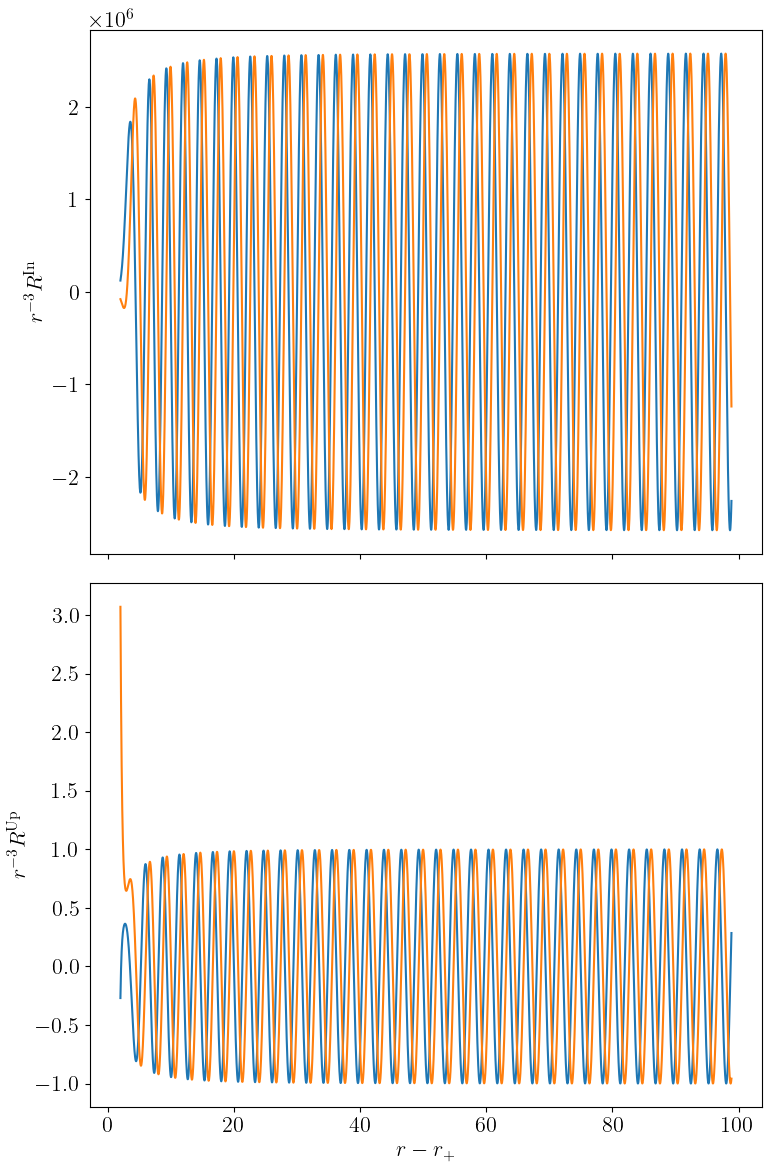

In [65]:
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.size'] = 16

Rin = Rt.radialsolutions('In')
Rup = Rt.radialsolutions('Up')
Delta = r_grid**2 - 2 * r_grid + a**2

fig, axs = plt.subplots(2, 1, figsize=(8, 12), sharex=True)
axs[0].plot(r_grid - r_hor, Rin.real*r_grid**(-3), label='Re')
axs[0].plot(r_grid - r_hor, Rin.imag*r_grid**(-3), label='Im')
axs[0].set_ylabel(r'$r^{-3} R^\mathrm{In}$')

axs[1].plot(r_grid - r_hor, Rup.real*r_grid**(-3), label='Re')
axs[1].plot(r_grid - r_hor, Rup.imag*r_grid**(-3), label='Im')
axs[1].set_ylabel(r'$r^{-3} R^\mathrm{Up}$')
axs[1].set_xlabel(r'$r - r_+$')

plt.tight_layout()
plt.show()